# **Exploratory Data Analysis Global Terrorism**

In [1]:
# 1uuje120RB8cGFnPQcSIZmzum3MHfYD6Y
# Install the gdown library
!pip install gdown

# Define the direct download link from your Google Drive
file_id = "1uuje120RB8cGFnPQcSIZmzum3MHfYD6Y"
url = f"https://drive.google.com/uc?id={file_id}"

# Define the local file path where you want to save the dataset
output_path = "/content/dataset.csv"

# Download the dataset using gdown
import gdown
gdown.download(url, output_path, quiet=False)
encoding = "ISO-8859-1"

# Now you can read the dataset using pandas or any other relevant library
import pandas as pd
df = pd.read_csv(output_path,encoding=encoding)



Downloading...
From: https://drive.google.com/uc?id=1uuje120RB8cGFnPQcSIZmzum3MHfYD6Y
To: /content/dataset.csv
100%|██████████| 163M/163M [00:05<00:00, 31.4MB/s]
<ipython-input-1-721af5e46705>:19: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output_path,encoding=encoding)


In [2]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
import sklearn

import warnings
warnings.filterwarnings('ignore')
import os

###**shape**

In [4]:
df.shape

(181691, 135)

###**info of the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


###**statistical_analysis**

In [6]:
df.describe

<bound method NDFrame.describe of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  regi

##**Lets preprocess the data**

In [7]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
# Assuming your DataFrame is named 'df'
column_names = list(df.columns)
print(column_names)


['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

###**rename the column names**

In [9]:
df.rename(columns = {'iyear': 'year' ,'imonth':'month','iday':'day','country_txt' :'countrytxt','provstate' : 'state' ,'region_txt':'regiontxt','attacktype1_txt':'attack','target1':'target','nkill':'killed','nwound':'wounded','summary':'summary','gname':'group','targtype1_txt':'target_type','weapsubtype1':'weapon_type','motive':'Motive'},inplace =True)

In [10]:
column_names = list(df.columns)
print(column_names)


['eventid', 'year', 'month', 'day', 'approxdate', 'extended', 'resolution', 'country', 'countrytxt', 'region', 'regiontxt', 'state', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attack', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'target_type', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'group', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'Motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3',

In [11]:
df  = df[['year','month','day','countrytxt','regiontxt','city','latitude','longitude','attack','killed','wounded','target','summary','group','target_type','weapon_type','Motive']]

In [12]:
df

,year,month,day,countrytxt,regiontxt,city,latitude,longitude,attack,killed,wounded,target,summary,group,target_type,weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,NaN,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),NaN,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,NaN,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),16.0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,5.0,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,11.0,NaN
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,18.0,NaN
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),7.0,NaN


###**visualize the data**

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'killed'}>],
       [<Axes: title={'center': 'wounded'}>,
        <Axes: title={'center': 'weapon_type'}>, <Axes: >]], dtype=object)

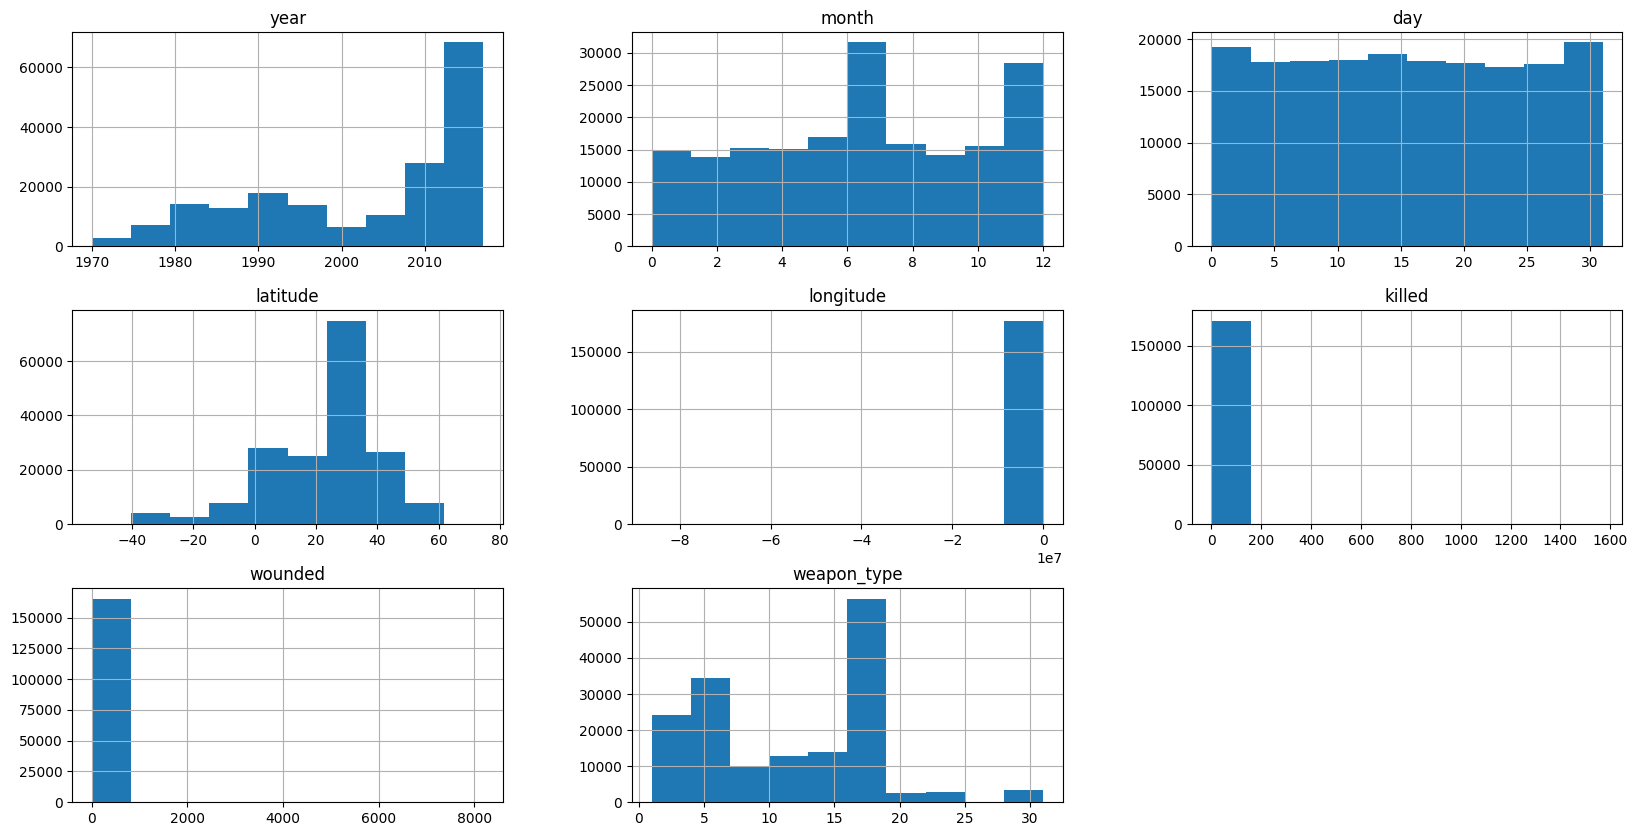

In [13]:
df.hist(figsize = (20,10))

In [14]:
df.describe

<bound method NDFrame.describe of         year  month  day          countrytxt                    regiontxt  \
0       1970      7    2  Dominican Republic  Central America & Caribbean   
1       1970      0    0              Mexico                North America   
2       1970      1    0         Philippines               Southeast Asia   
3       1970      1    0              Greece               Western Europe   
4       1970      1    0               Japan                    East Asia   
...      ...    ...  ...                 ...                          ...   
181686  2017     12   31             Somalia           Sub-Saharan Africa   
181687  2017     12   31               Syria   Middle East & North Africa   
181688  2017     12   31         Philippines               Southeast Asia   
181689  2017     12   31               India                   South Asia   
181690  2017     12   31         Philippines               Southeast Asia   

                 city   latitude   longit

### **this visualization show the correlation of the each variables we took**

<Axes: >

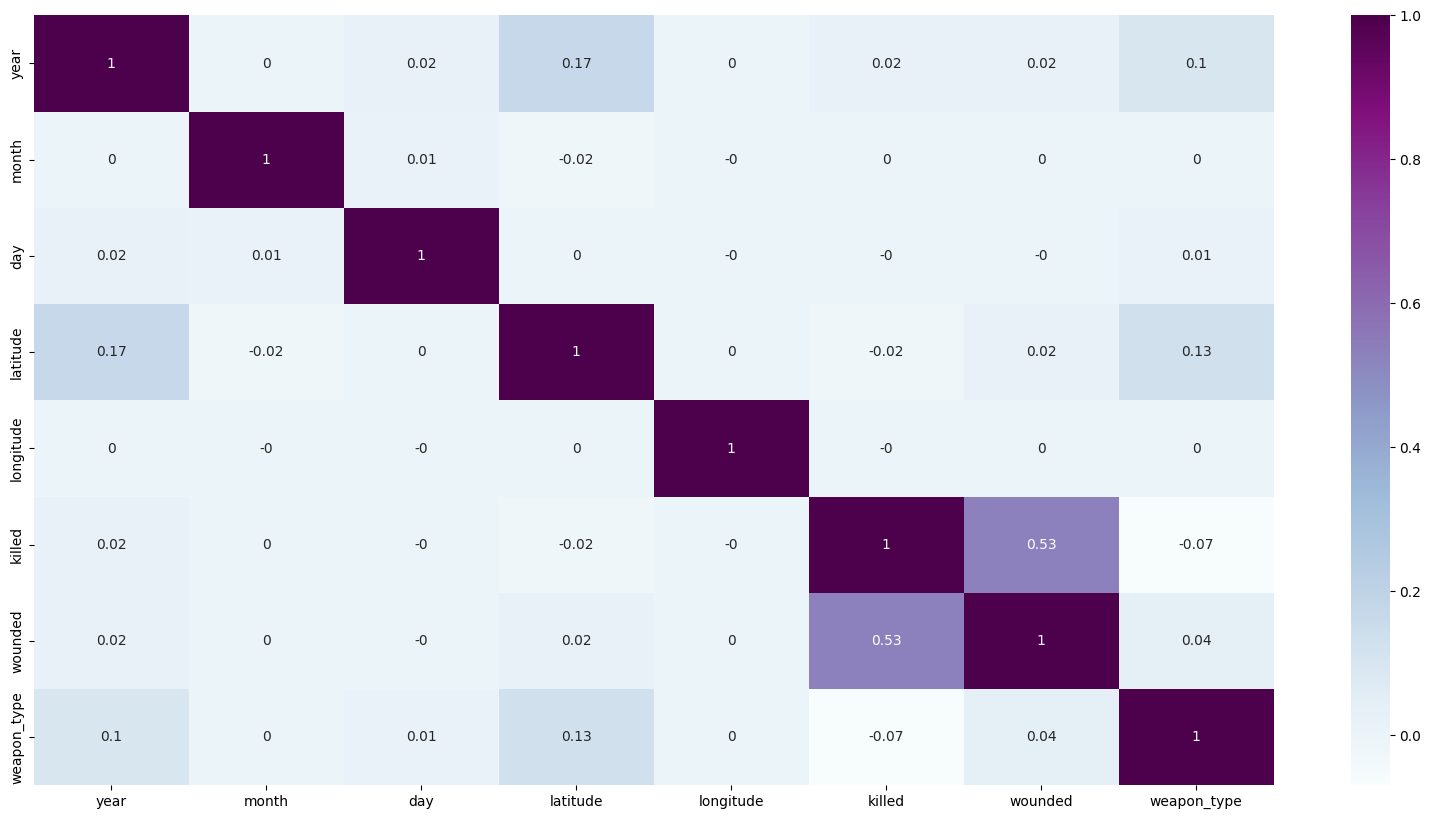

In [15]:
plt.figure(figsize = (20,10))

sns.heatmap(np.round(df.corr(),2),annot =True,cmap='BuPu')

### here we take the machine learning model for the highly correlated part , from the figure that is killed and wounded

##**no of terriost activities**

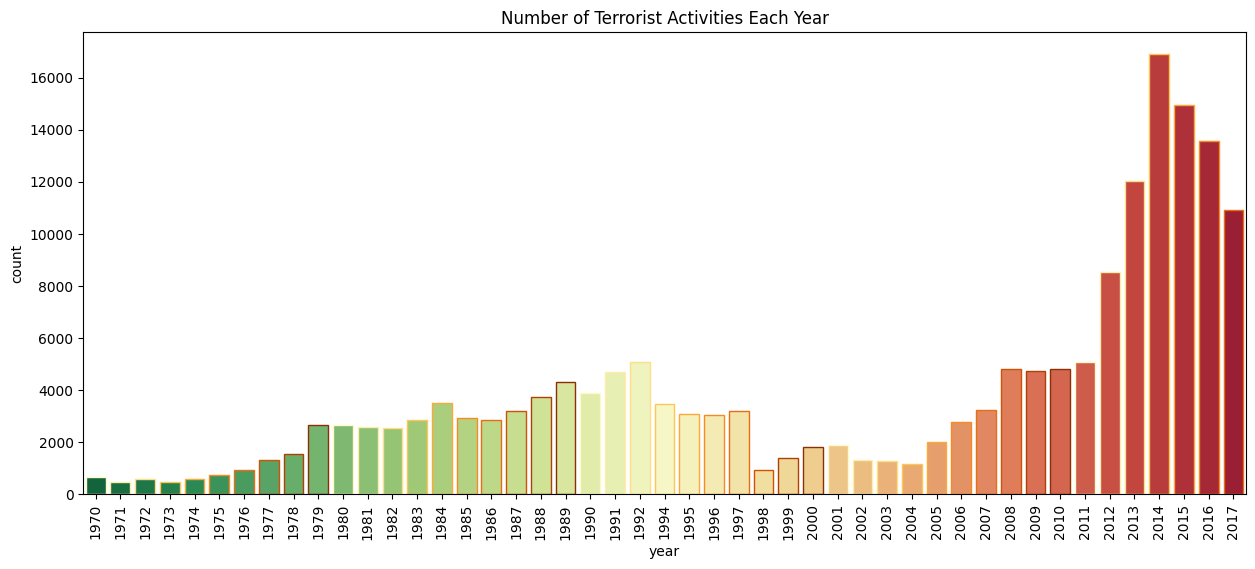

In [16]:

from google.colab.output import enable_custom_widget_manager
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.countplot(x='year', data=df, palette='RdYlGn_r', edgecolor=sns.color_palette('YlOrBr', 10))
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activities Each Year")
plt.show()


### 2014 and 2015 has large no of activities


### number of attacks were there in 1970 and 2017 and also finging the percentage

In [17]:
year = df.year.value_counts().to_dict()
rate = ((year[2017]-year[1970])/year[2017])*100
print(year[1970],"attack happend in 1970",year[2017],"attack happend in 2017 year")
print("so the no of attacks are increased by the round figure value of ",np.round(rate,0))

651 attack happend in 1970 10900 attack happend in 2017 year
so the no of attacks are increased by the round figure value of  94.0


### the no of casuaalities corresponding to the killed people in each country for each year .

In [18]:
df.dropna

<bound method DataFrame.dropna of         year  month  day          countrytxt                    regiontxt  \
0       1970      7    2  Dominican Republic  Central America & Caribbean   
1       1970      0    0              Mexico                North America   
2       1970      1    0         Philippines               Southeast Asia   
3       1970      1    0              Greece               Western Europe   
4       1970      1    0               Japan                    East Asia   
...      ...    ...  ...                 ...                          ...   
181686  2017     12   31             Somalia           Sub-Saharan Africa   
181687  2017     12   31               Syria   Middle East & North Africa   
181688  2017     12   31         Philippines               Southeast Asia   
181689  2017     12   31               India                   South Asia   
181690  2017     12   31         Philippines               Southeast Asia   

                 city   latitude   longit

## no of attacks

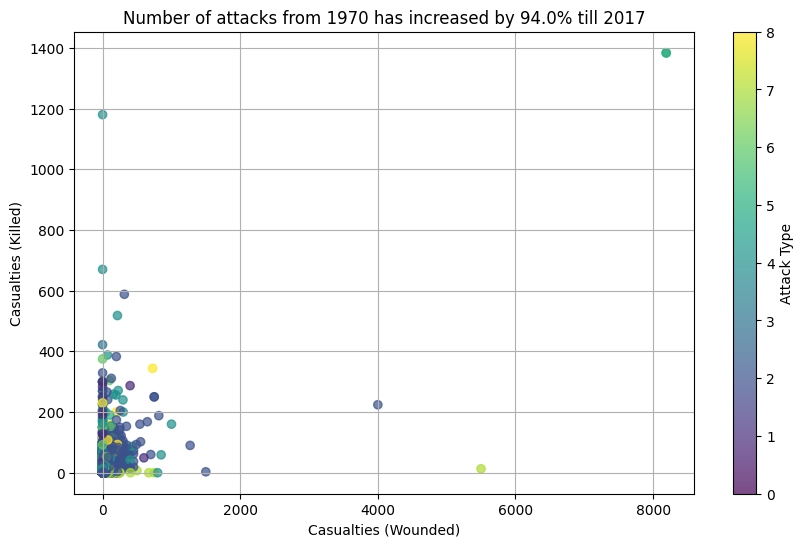

In [19]:
import matplotlib.pyplot as plt

# Create a numerical category for attack types
attack_types = df['attack'].unique()
attack_type_mapping = {attack_type: i for i, attack_type in enumerate(attack_types)}
df['attack_category'] = df['attack'].map(attack_type_mapping)

# Calculate the rate
rate = ((year[2017] - year[1970]) / year[2017]) * 100
title = f'Number of attacks from 1970 has increased by {np.round(rate, 0)}% till 2017'

# Create a scatter plot with colors based on attack types
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['wounded'], df['killed'], c=df['attack_category'], cmap='viridis', alpha=0.7)
plt.xlabel('Casualties (Wounded)')
plt.ylabel('Casualties (Killed)')
plt.title(title)
plt.colorbar(scatter, label='Attack Type')
plt.grid(True)
plt.show()


### method attack

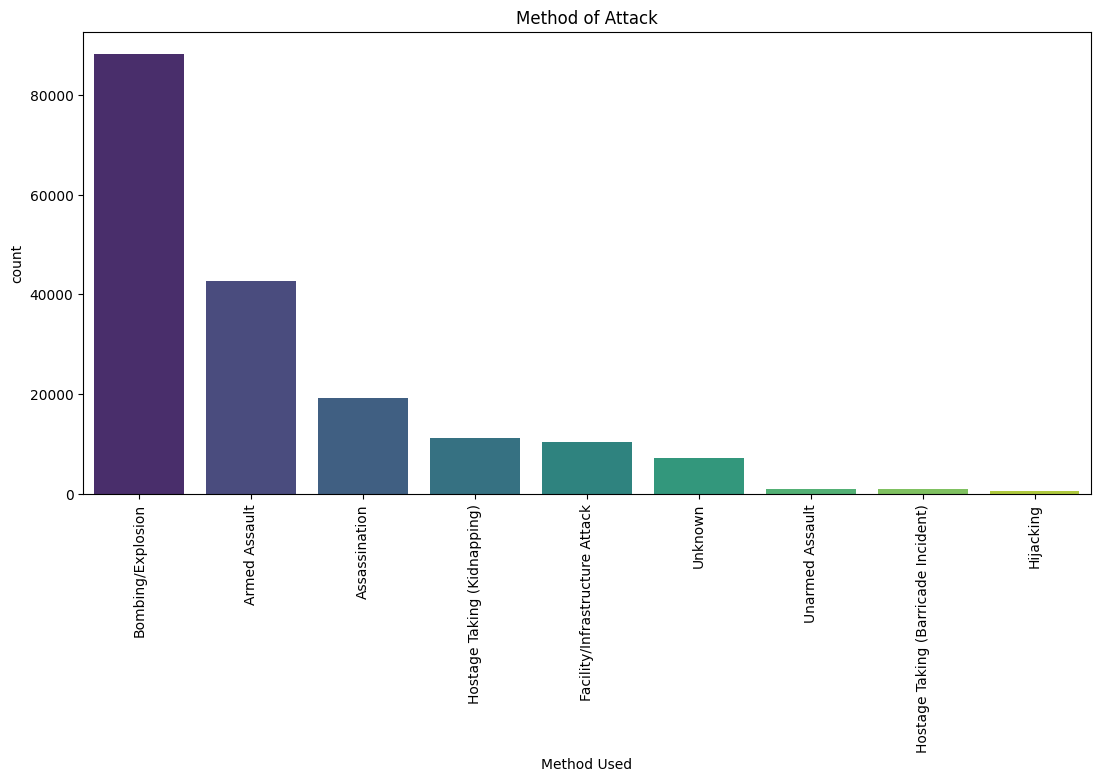

In [20]:
plt.figure(figsize=(13, 6))
order = df['attack'].value_counts().index.tolist()  # Extract and convert to a list
sns.countplot(data=df, x='attack', order=order, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Method Used')
plt.title("Method of Attack")
plt.show()


### here we can see that bombing method used is ,ore . and hijacking is the least place


#type of target

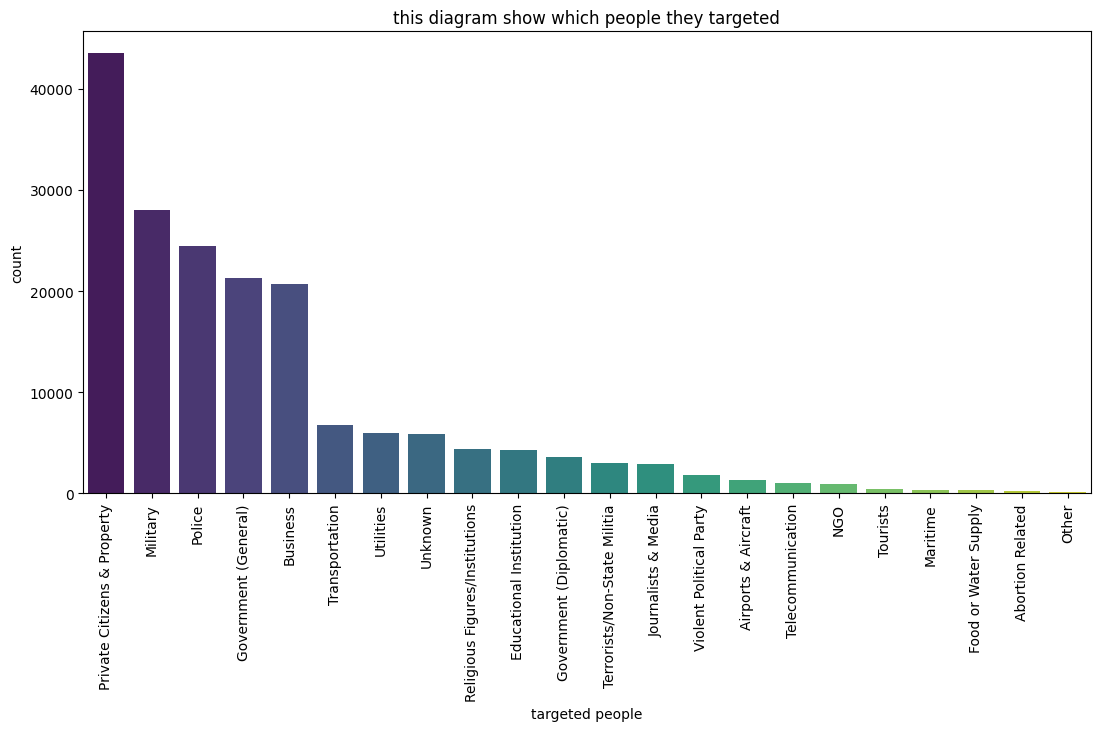

In [21]:

plt.figure(figsize=(13, 6))
order = df['target_type'].value_counts().index.tolist()  # Extract and convert to a list
sns.countplot(data=df, x='target_type', order=order, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('targeted people')
plt.title("this diagram show which people they targeted")
plt.show()


### we can c that most of the time they targeted the private citizens and property.

#attacks in each country and area or region

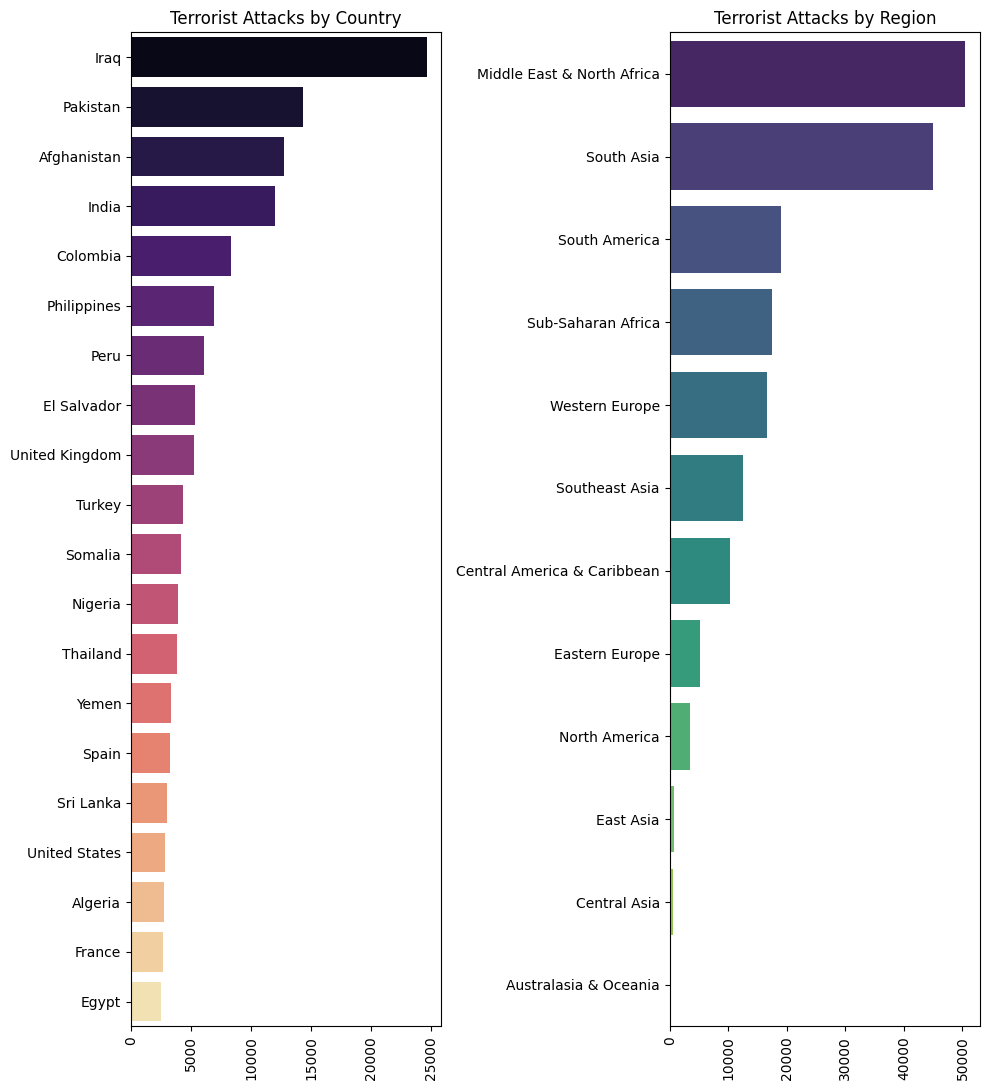

In [22]:
fig, axes = plt.subplots(figsize=(10, 11), nrows=1, ncols=2)

# Create a barplot for the top 20 countries with terrorist attacks
sns.barplot(x=df['countrytxt'].value_counts()[:20].values, y=df['countrytxt'].value_counts()[:20].index, ax=axes[0], palette='magma')
axes[0].set_title('Terrorist Attacks by Country')

# Create a barplot for the top 20 regions with terrorist attacks
sns.barplot(x=df['regiontxt'].value_counts()[:20].values, y=df['regiontxt'].value_counts()[:20].index, ax=axes[1], palette='viridis')
axes[1].set_title('Terrorist Attacks by Region')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

# Display the subplots
plt.tight_layout()
plt.show()


### in iraq is mosta ttacks and least is in egypt, and also  in region  middle east and south africa is most and least is in australasia and oceania

In [23]:
df.columns

Index(['year', 'month', 'day', 'countrytxt', 'regiontxt', 'city', 'latitude',
       'longitude', 'attack', 'killed', 'wounded', 'target', 'summary',
       'group', 'target_type', 'weapon_type', 'Motive', 'attack_category'],
      dtype='object')

In [24]:
terr = df.groupby(['countrytxt'],as_index=False).count()

### lets create a globe and look the no of attacks

In [25]:
import plotly.express as px

fig = px.choropleth(terr,
                    locations='countrytxt',
                    locationmode='country names',
                    color='year',
                    hover_name='countrytxt',
                    projection='orthographic',
                    title='Total Number of Attacks (1970-2017)',
                    labels={'year': 'Number of Attacks'})

fig.show()



## rotate the glob to c all tha possibilities.

# noe lets see which organization has carried out more attacks


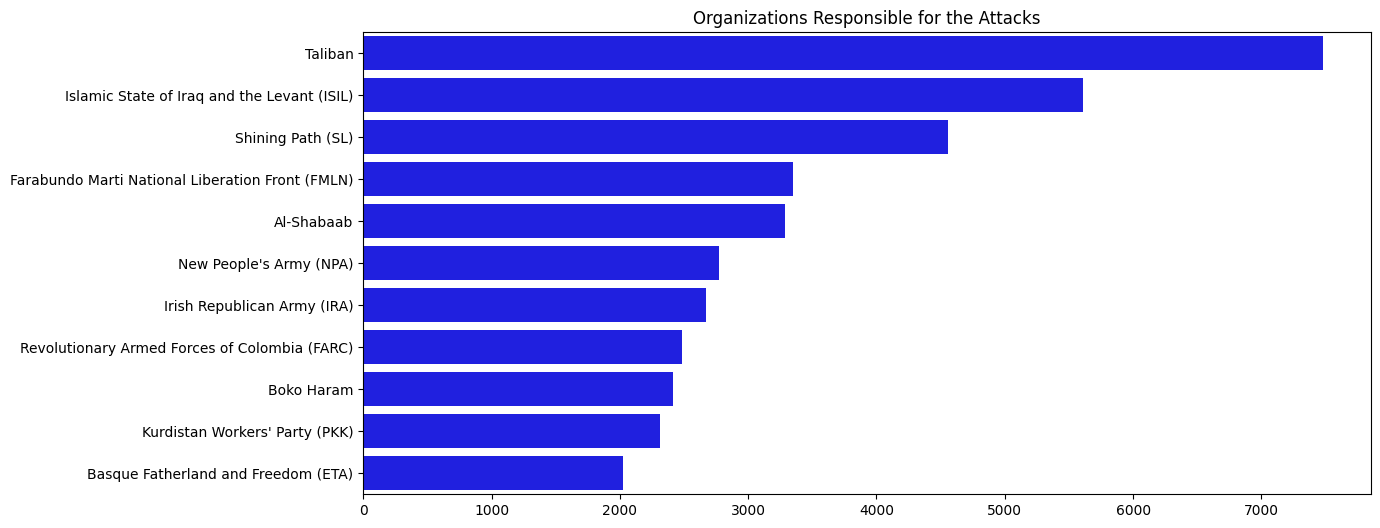

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
sns.barplot(y=df['group'].value_counts()[1:12].index, x=df['group'].value_counts()[1:12].values,
            palette=['blue'])  # Use a list with the color 'blue'
plt.title('Organizations Responsible for the Attacks')
plt.show()


## from the above bar chat we can say that the taliban is the group that is most responsible for the attacks in the world

# insights derived from the above :


1.   iraq has the most attacks
2.   the middle east and north afriac is most targeted.

3.   maximum no of attacks are due to use of bombings
4.   maximum no of attcks on private citizens and property.

5.  taliban and isil has a most active organization.






